<a href="https://colab.research.google.com/github/SidharthArya/Computer_Vision_Class_Manit/blob/main/Assignments/001_Enlarge_the_size_of_image_using_various_interpolation_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [518]:
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
# CV2 for comparison
import cv2

In [519]:
# Downloading Image
!curl -o image.jpg https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.doglistener.co.uk%2Fsites%2Fdefault%2Ffiles%2FPuppy-Beagle.jpg&f=1&nofb=1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46723    0 46723    0     0  26412      0 --:--:--  0:00:01 --:--:-- 26412


In [520]:
im = image.imread('image.jpg',format='jpg')
imref = cv2.imread('image.jpg')
im, imref

(array([[[192, 188, 211],
         [192, 188, 211],
         [192, 188, 211],
         ...,
         [172, 169, 178],
         [173, 170, 179],
         [173, 170, 179]],
 
        [[192, 188, 211],
         [192, 188, 211],
         [192, 188, 211],
         ...,
         [173, 170, 179],
         [173, 170, 179],
         [173, 170, 179]],
 
        [[192, 188, 211],
         [192, 188, 211],
         [191, 187, 210],
         ...,
         [174, 171, 180],
         [174, 171, 180],
         [174, 171, 180]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [521]:
im.size, imref.size

(607500, 607500)

In [522]:
im.shape, imref.shape

((450, 450, 3), (450, 450, 3))

# Images

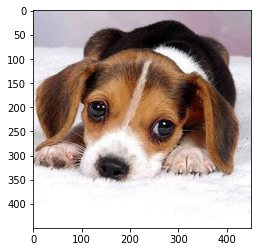

In [523]:
## using np.flip because cv2 reads image in BGR format

plt.imshow(np.flip(imref,axis=2))

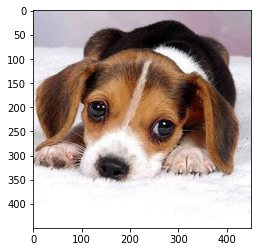

In [524]:
plt.imshow(im)

In [525]:
np.flip(imref,axis=2).reshape(-1).shape, im.reshape(-1).shape

((607500,), (607500,))

In [526]:
(np.flip(imref,axis=2).reshape(-1) == im.reshape(-1))[476362]

True

In [527]:
sample =np.array([[[0,0,0],[255,255,255]],[[255,255,255],[0,0,0]]])

sample.shape

(2, 2, 3)

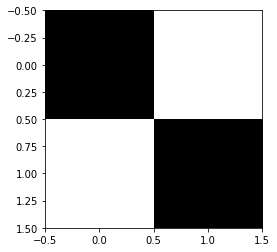

In [528]:
plt.imshow(sample)

# Resizing


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[[  0.,   0.,   0.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [  0.,   0.,   0.]]], dtype=float32)

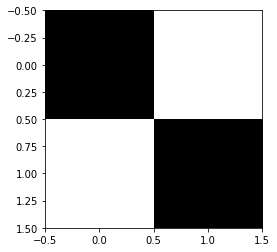

In [529]:
plt.imshow(sample.astype(np.float32))

sample.astype(np.float32)

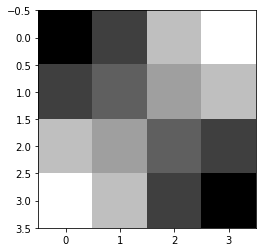

In [530]:

INTERPOLATION=cv2.INTER_LINEAR
cv2.resize(sample.astype(np.float32), (3,3), interpolation=INTERPOLATION)

plt.imshow(cv2.resize(sample.astype(np.float32), (4,4), interpolation=INTERPOLATION).astype(np.int))

In [531]:
image_.astype(np.uint8) is np.flip(image_ref, axis=2)

False

In [741]:
def inter_linear_resize(im, shape=im.shape):
  im_shape=(im.shape[0], im.shape[1])

  scaling_factor=((shape[0]-1)*1.0/(im.shape[0] -1), (shape[1]-1)*1.0/(im.shape[1] -1))


  print(scaling_factor)
  try:
    channels = im.shape[2]

  except:

    channels = 1
  output = np.ones(np.append(np.multiply(scaling_factor,im.shape[0:2]).astype(np.int32), channels))*-1

  for i, row in enumerate(im):
    for j, column in enumerate(row):
        output[int(i*scaling_factor[0]),int(j*scaling_factor[1])] = im[i,j]

    js = (np.array(range(2))*scaling_factor[1]).astype(np.int32)    # filled columns
    for j, column in enumerate(output[int(i*scaling_factor[0])]):
      if j not in js:
        v = j*1.0/scaling_factor[1]
        weight = v - int(v)
        try:
          output[int(i*scaling_factor[0]), j] = (1-weight)*im[i, int(v)] + weight* im[i, int(v)+1]
        except:
          output[int(i*scaling_factor[0]), j]  = im[i, int(v)]


  Is = (np.array(range(2))*scaling_factor[0]).astype(np.int32)    # filled rows
  for i, row in enumerate(output):
    if i not in Is:
      v = i*1.0/scaling_factor[0]
      weight = v - int(v)
      try:
        output[i] = output[int(int(v)*scaling_factor[0])]*(1 - weight) + output[int((int(v)+1)*scaling_factor[0])]*weight
      except:
        output[i]  = output[i, int(v)]
  return output[:shape[0],:shape[1]]


In [742]:
sample2 = inter_linear_resize(sample, shape=(8,8)).astype(np.int32)

plt.imshow(sample2)

(7.0, 7.0)
[0 0 0]


ValueError: ignored

(0.42857142857142855, 0.42857142857142855)


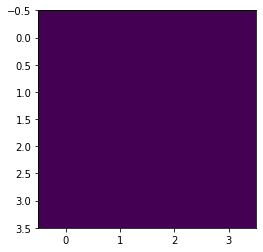

In [735]:
plt.imshow(inter_linear_resize(sample2, shape=(4,4)).astype(np.int32))

In [736]:
np.insert(sample2, -1, sample2[-1], axis=0)


array([[-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1]], dtype=int32)

In [722]:
print("My:",inter_linear_resize(sample, shape=(4,4)).astype(np.int32),"\nOpenCV:\n",  cv2.resize(sample.astype(np.float32), (4,4), interpolation=cv2.INTER_LINEAR_EXACT).astype(np.int32))

(3.0, 3.0)
My: [[[  0   0   0]
  [ 85  85  85]
  [170 170 170]
  [255 255 255]]

 [[ 85  85  85]
  [113 113 113]
  [141 141 141]
  [170 170 170]]

 [[170 170 170]
  [141 141 141]
  [113 113 113]
  [ 85  85  85]]

 [[255 255 255]
  [170 170 170]
  [ 85  85  85]
  [  0   0   0]]] 
OpenCV:
 [[[  0   0   0]
  [ 63  63  63]
  [191 191 191]
  [255 255 255]]

 [[ 63  63  63]
  [ 95  95  95]
  [159 159 159]
  [191 191 191]]

 [[191 191 191]
  [159 159 159]
  [ 95  95  95]
  [ 63  63  63]]

 [[255 255 255]
  [191 191 191]
  [ 63  63  63]
  [  0   0   0]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


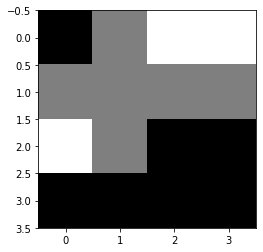

In [571]:
plt.imshow(sample_new[0:].astype(np.int32))

In [578]:
print("My:",inter_linear_resize(sample, shape=(4,4)).astype(np.int32),"\nOpenCV:\n",  bilinear_resize(sample, 4, 4), cv2.resize(sample.astype(np.float32), (4,4), interpolation=cv2.INTER_LINEAR_EXACT).astype(np.int32))

ValueError: ignored

In [581]:
bilinear_resize(sample[:,:,0], 4, 4)

array([[  0.        ,  85.        , 170.        , 255.        ],
       [ 85.        , 113.33333333, 141.66666667, 170.        ],
       [170.        , 141.66666667, 113.33333333,  85.        ],
       [255.        , 170.        ,  85.        ,   0.        ]])